In [31]:
# mostly used for estimating the noise level of the data (good for noisy datasets)
# TODO: finish this properly
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import *
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.pipeline import *
from sklearn.preprocessing import StandardScaler
import sklearn.datasets
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

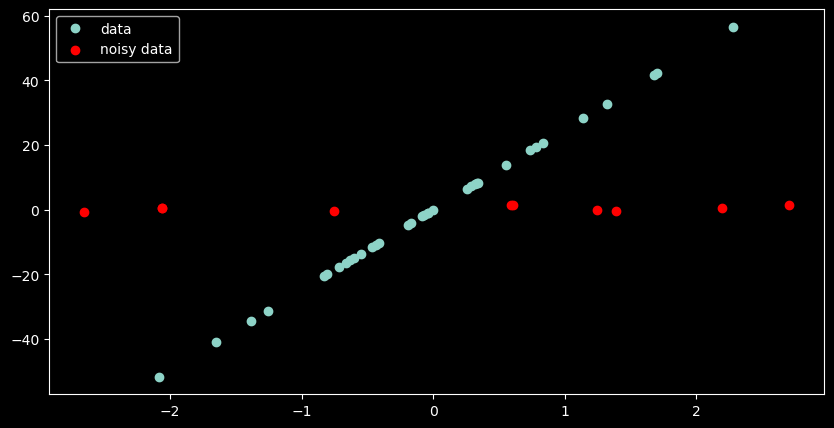

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
X,y = sklearn.datasets.make_regression(n_samples=35, n_features=1, noise=0) # no noise here

rnd = np.random.RandomState(42)
rnd_X = rnd.uniform(-3, 3, size=10)

rnd_Y = 0.5 + np.sin(3 * rnd_X).squeeze() + rnd.normal(0, 0.3)

ax.plot(X,y,'o',label='data')
ax.scatter(rnd_X, rnd_Y, color='red', label='noisy data')

ax.legend()

In [33]:
# 
kernel = 1.0 * RBF(
    length_scale=1e1, 
    length_scale_bounds=(1e-3, 1e4)) \
    + WhiteKernel(
        noise_level=1, noise_level_bounds=(1e-5, 1e1)
    )

gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.0)
gpr.fit(rnd_X.reshape(-1,1), rnd_Y)
y_mean, y_std = gpr.predict(X, return_std=True)

Text(0, 0.5, 'y')

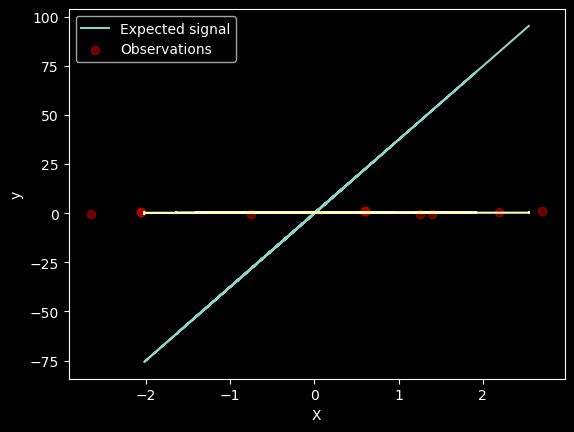

In [37]:
plt.plot(X, y, label="Expected signal")
plt.scatter(x=rnd_X, y=rnd_Y, color="red", alpha=0.4, label="Observations")
plt.errorbar(X, y_mean, y_std)
plt.legend()
plt.xlabel("X")
plt.ylabel("y")